In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Usman\Downloads\churn\Churn_Modelling.csv")
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6847,6848,15809462,Polyakova,656,France,Male,30,3,0.00,2,0,1,17104.00,0
505,506,15576623,Outlaw,584,France,Male,31,5,0.00,2,1,0,31474.27,0
4031,4032,15648461,Hs?eh,688,Spain,Male,37,7,138162.41,2,1,1,113926.31,0
110,111,15803526,Eremenko,685,Germany,Male,30,3,90536.81,1,0,1,63082.88,0
714,715,15807609,Yuan,650,Spain,Female,25,3,86605.50,3,1,0,16649.31,1
4690,4691,15681990,Palmerston,497,Germany,Male,24,6,111769.14,2,1,0,55859.27,0


In [3]:
df=df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1)

In [4]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4516,497,Germany,Female,32,8,111537.23,4,1,1,9497.99,1
9236,640,Spain,Male,47,6,89047.14,1,1,0,116286.25,0
9243,505,Spain,Male,37,0,134006.39,1,1,1,93736.69,0
7973,592,Germany,Male,31,7,124593.23,1,1,0,86079.67,0
9867,787,France,Male,32,4,0.00,2,1,1,13238.93,0


In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df["IsActiveMember"].unique()

array([1, 0], dtype=int64)

In [7]:
df=pd.get_dummies(df,columns=["Geography"])

In [8]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [9]:
df["Gender"].replace({"Female":0,"Male":1},inplace=True)

In [10]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1043,579,1,35,1,0.00,2,1,0,4460.20,0,1,0,0
5489,728,1,33,8,129907.63,1,0,1,36083.96,0,1,0,0
2232,649,1,36,8,0.00,2,1,0,161668.15,0,0,0,1
6140,488,0,31,8,97588.60,1,0,0,124210.53,0,1,0,0
3953,652,0,33,3,124832.51,1,1,0,195877.06,0,0,0,1


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
df[["CreditScore","Balance","EstimatedSalary"]]=scaler.fit_transform(df[["CreditScore","Balance","EstimatedSalary"]])

In [13]:
df.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4381,0.284,1,39,7,0.0,2,0,1,0.356592,0,1,0,0
7064,0.736,0,39,3,0.0,2,1,1,0.726787,0,1,0,0
5668,0.634,1,42,7,0.0,1,0,1,0.541739,1,1,0,0
3108,0.420,0,28,1,0.0,2,1,1,0.604403,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df.drop("Exited",axis=1)
y=df["Exited"]

In [16]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
df.shape

(10000, 13)

In [27]:
len(X_train.columns)

12

In [30]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(6,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [31]:
model.fit(X_train,y_train,epochs=6)

Epoch 1/6
250/250 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.8000
Epoch 2/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.8000
Epoch 3/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.8015
Epoch 4/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.8086
Epoch 5/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8127
Epoch 6/6
250/250 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8125


In [32]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.8030


[0.4442325830459595, 0.8029999732971191]

In [37]:
yp=model.predict(X_test)

In [38]:
yp[0:5]

array([[0.32648936],
       [0.15314826],
       [0.18477395],
       [0.5393872 ],
       [0.1462681 ]], dtype=float32)

In [39]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [41]:
y_pred[0:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [42]:
y_test[0:10]

3912    0
5967    0
2442    0
5758    1
9882    1
8417    0
9945    0
7754    1
3544    0
9471    0
Name: Exited, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1563
           1       0.65      0.21      0.32       437

    accuracy                           0.80      2000
   macro avg       0.73      0.59      0.60      2000
weighted avg       0.78      0.80      0.76      2000



In [45]:
confusion_matrix(y_test,y_pred)

array([[1515,   48],
       [ 346,   91]], dtype=int64)

In [46]:
import seaborn as sn

In [47]:
cm=tf.math.confusion_matrix(y_test,y_pred)

Text(69.0, 0.5, 'True')

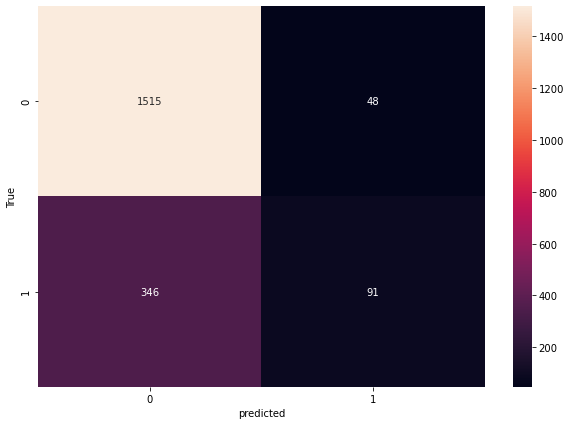

In [53]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("True")